# Генерация признаков на основе индикаторов технического анализа

In [64]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')
import Handlers as hd

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas_ta as ta

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_palette('Set2')

# Загрузка данных
данные после обработки пропусков и добавления базовых признаков


In [66]:
df = pd.read_parquet(("../data/ETH-Full-1H_prepared.parquet"))
df = df.asfreq("H")  # установка периода для timeseries
df

,Open,High,Low,Close,Volume,Trades,Open_log,High_log,Low_log,Close_log,...,up_move,down_move,up_shadow,down_shadow,Month,Week_of_Year,Day_of_Month,Day_of_Week,Hour,Long
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-09-01 00:00:00,384.79,388.74,384.79,388.74,162.97779,131.0,5.952698,5.962911,5.952698,5.962911,...,0.010213,0.000000,0.000000,0.000000,9,35,1,4,0,1
2017-09-01 01:00:00,388.69,394.06,387.53,391.37,248.72949,262.0,5.962782,5.976503,5.959793,5.969653,...,0.013721,0.002989,0.006850,0.002989,9,35,1,4,1,0
2017-09-01 02:00:00,392.88,394.39,389.46,390.88,198.82856,225.0,5.973504,5.977340,5.964761,5.968401,...,0.003836,0.008743,0.003836,0.003639,9,35,1,4,2,0
2017-09-01 03:00:00,391.70,393.13,390.86,390.86,141.56114,138.0,5.970496,5.974140,5.968349,5.968349,...,0.003644,0.002147,0.003644,0.000000,9,35,1,4,3,0
2017-09-01 04:00:00,392.65,394.27,387.64,390.33,135.65894,128.0,5.972919,5.977036,5.960077,5.966993,...,0.004117,0.012842,0.004117,0.006915,9,35,1,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-23 19:00:00,1846.76,1852.35,1844.92,1846.49,16550.18290,21648.0,7.521188,7.524210,7.520191,7.521042,...,0.003022,0.000997,0.003022,0.000851,4,16,23,6,19,0
2023-04-23 20:00:00,1846.49,1852.30,1838.03,1848.89,13113.47550,19445.0,7.521042,7.524183,7.516450,7.522341,...,0.003142,0.004592,0.001843,0.004592,4,16,23,6,20,0
2023-04-23 21:00:00,1848.88,1859.32,1847.59,1854.66,7855.61330,13824.0,7.522335,7.527966,7.521637,7.525457,...,0.005631,0.000698,0.002509,0.000698,4,16,23,6,21,0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49464 entries, 2017-09-01 00:00:00 to 2023-04-23 23:00:00
Freq: H
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open              49464 non-null  float64
 1   High              49464 non-null  float64
 2   Low               49464 non-null  float64
 3   Close             49464 non-null  float64
 4   Volume            49464 non-null  float64
 5   Trades            49464 non-null  float64
 6   Open_log          49464 non-null  float64
 7   High_log          49464 non-null  float64
 8   Low_log           49464 non-null  float64
 9   Close_log         49464 non-null  float64
 10  Volume_log        49464 non-null  float64
 11  Trades_log        49464 non-null  float64
 12  Open_log_return   49464 non-null  float64
 13  High_log_return   49464 non-null  float64
 14  Low_log_return    49464 non-null  float64
 15  Close_log_return  49464 non-null  float64
 1

### Работа с TA признаками
Добавление скользящих средних по ценам закрытия


In [70]:
df['SMA_6h'] = ta.sma(df['Close'], length=6).round(2)
df['SMA_5d'] = ta.sma(df['Close'], length=24 * 5).round(2)
df['SMA_30d'] = ta.sma(df['Close'], length=24 * 30).round(2)

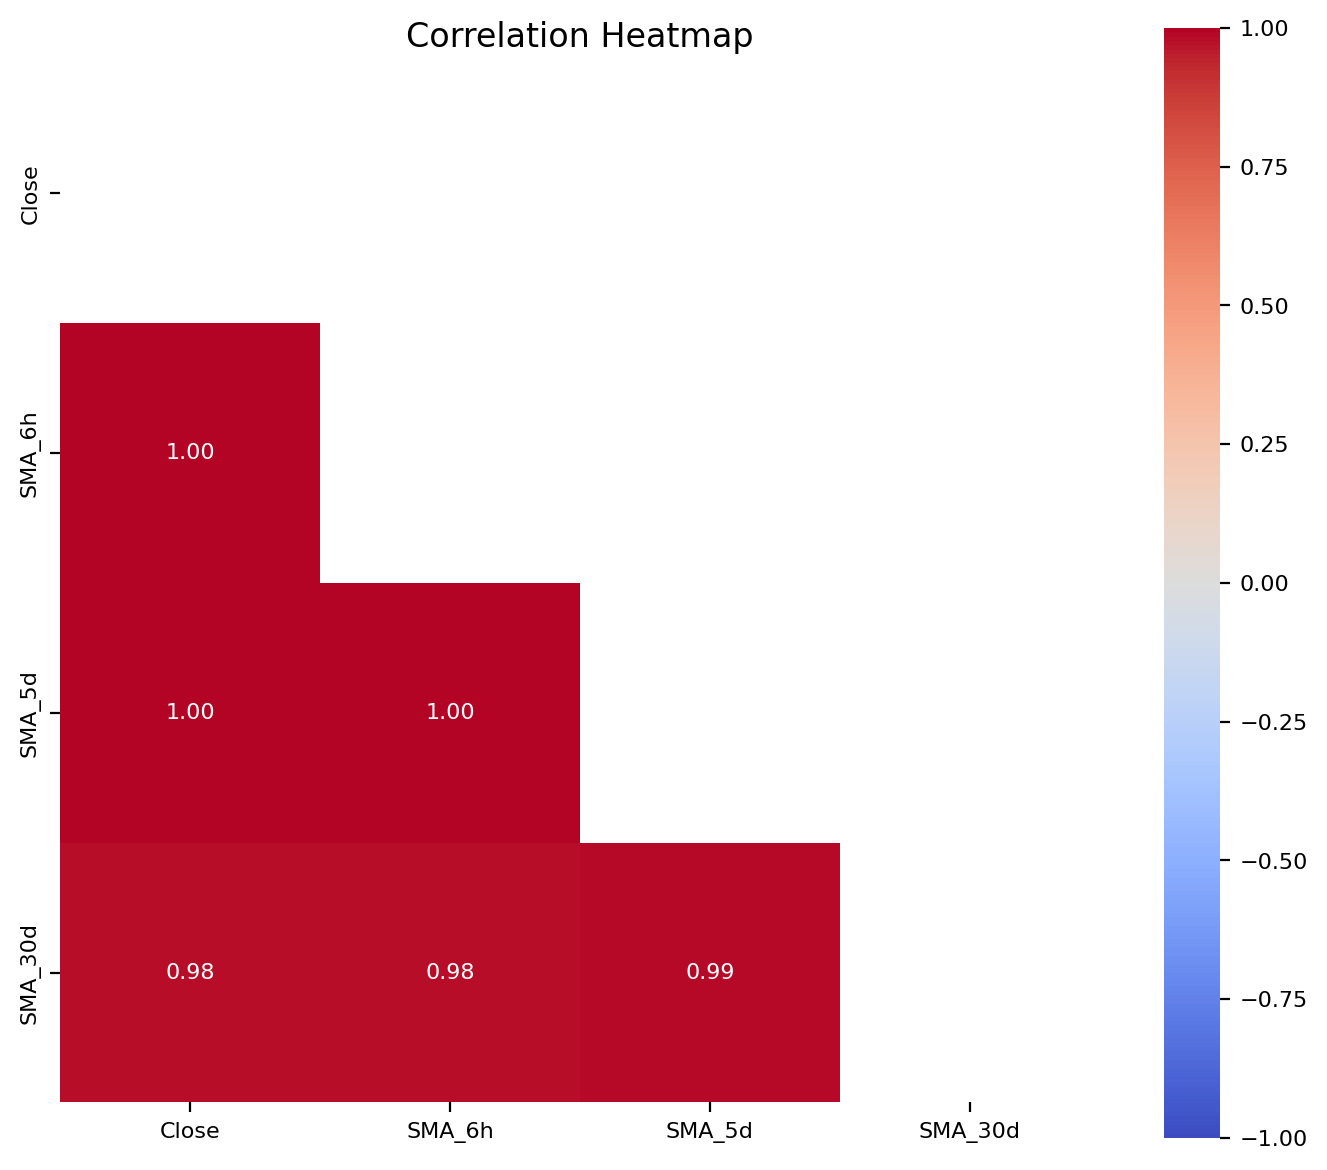

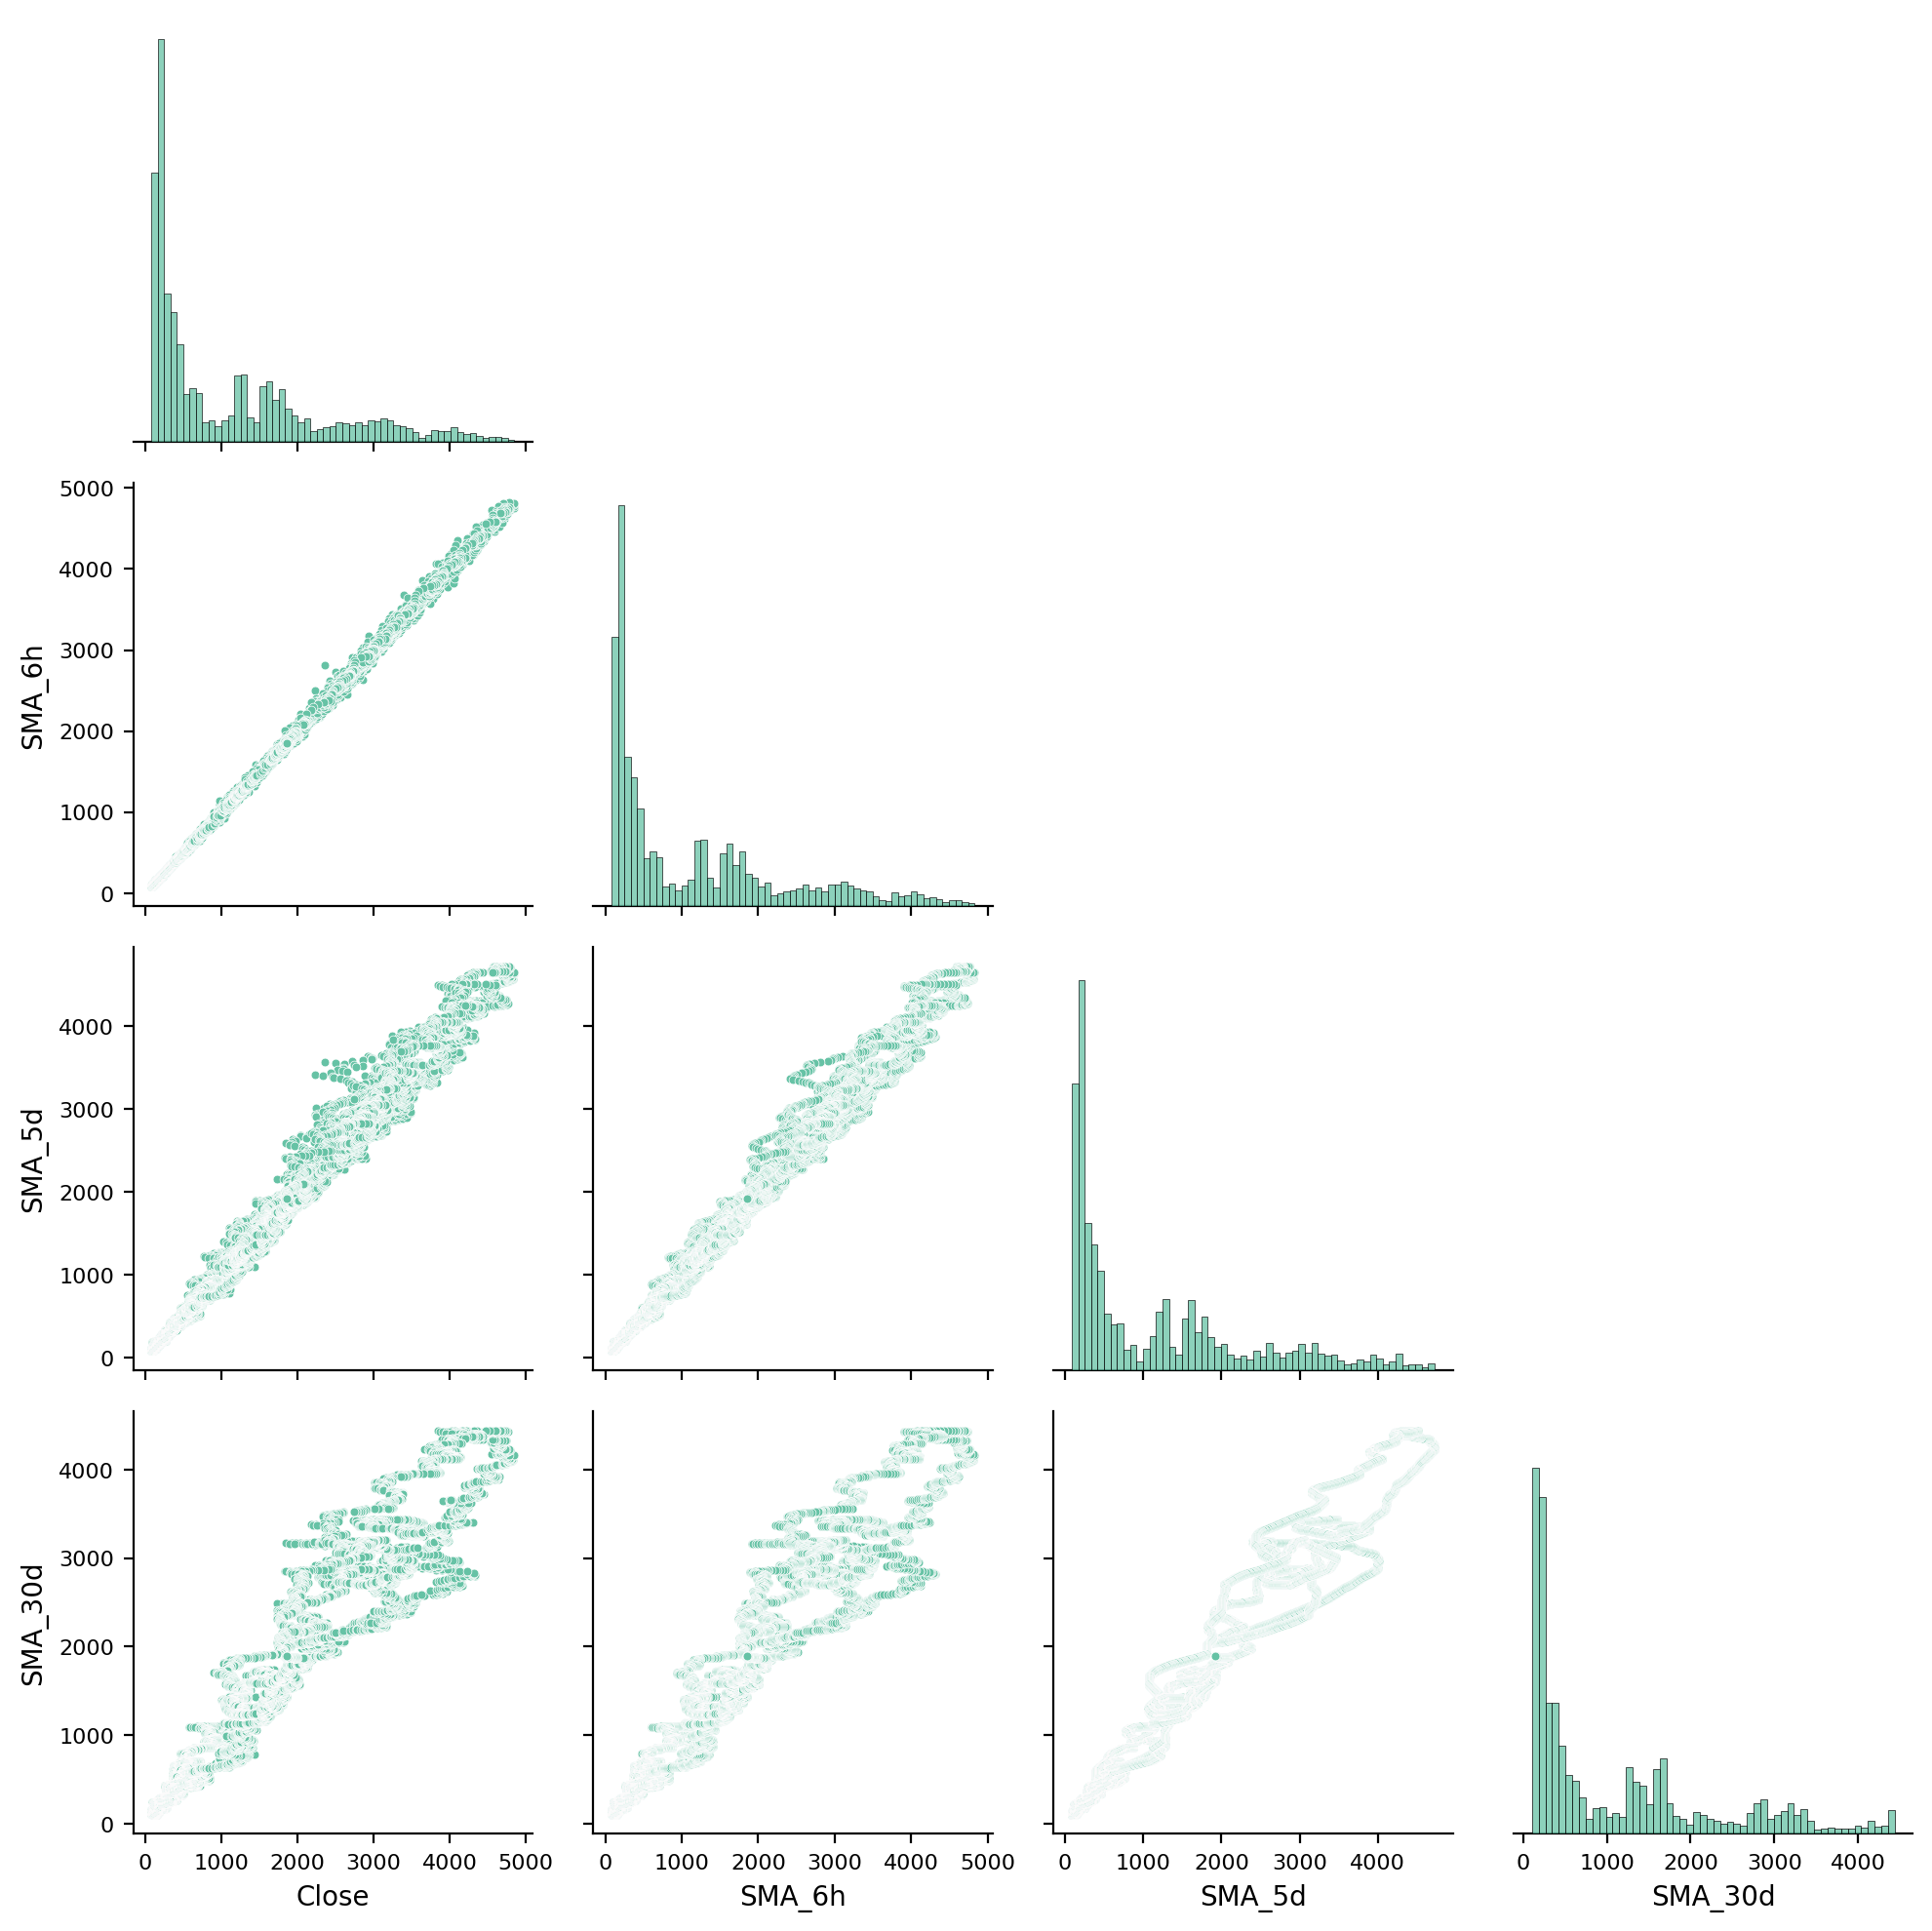

In [71]:
sma_df = df[['Close', 'SMA_6h', 'SMA_5d', 'SMA_30d']].dropna()
hd.plot_corr_heatmap(sma_df)
hd.plot_pairplot(sma_df)

В таком виде вновь сформированные признаки использовать нельзя, мультиколлинеарность зашкаливает и так же очевидно что признаки нестационарны, т.к. это усреднение исходного ценового ряда.

In [73]:
sma_cols = ['SMA_6h', 'SMA_5d', 'SMA_30d']

for col in sma_cols:
    print("Column Name : ", col)
    hd.adf(sma_df[col].values)
    print()

Column Name :  SMA_6h
Test-Statistic: -1.5310856171981733
P-Value: 0.5180815415565461
Time series is non-stationary

Column Name :  SMA_5d
Test-Statistic: -1.7658326512982099
P-Value: 0.39755185364268303
Time series is non-stationary

Column Name :  SMA_30d
Test-Statistic: -2.034729890031028
P-Value: 0.27155585215159905
Time series is non-stationary



In [74]:
for col in sma_cols:
    print("Column Name : ", col)
    hd.pirson_normal_test(sma_df[col].values)
    print()

Column Name :  SMA_6h
Test on normal distribution: 7492.616583228129
P-Value: 0.0
NOT a normal distribution!

Column Name :  SMA_5d
Test on normal distribution: 7435.09079157382
P-Value: 0.0
NOT a normal distribution!

Column Name :  SMA_30d
Test on normal distribution: 7202.25966595967
P-Value: 0.0
NOT a normal distribution!



Признаки нужно перевести в логарифмическую шкалу

In [75]:
for col in sma_cols:
    df[col + '_log'] = np.log(df[col])

Дальше все перевожу к состоянию разницы с логарифмической ценой закрытия. На сколько цена закрытия выше или ниже sma.

In [76]:
sma_log_cols = ['SMA_6h_log', 'SMA_5d_log', 'SMA_30d_log']

for col in sma_log_cols:
    df[col.replace('_log', '_diff')] = df['Close_log'] - df[col]

Изучаю полученные после преобразования признаки на основе SMA с Close_log_return

In [77]:
cols = ['Close_log_return', 'SMA_6h_diff', 'SMA_5d_diff', 'SMA_30d_diff']

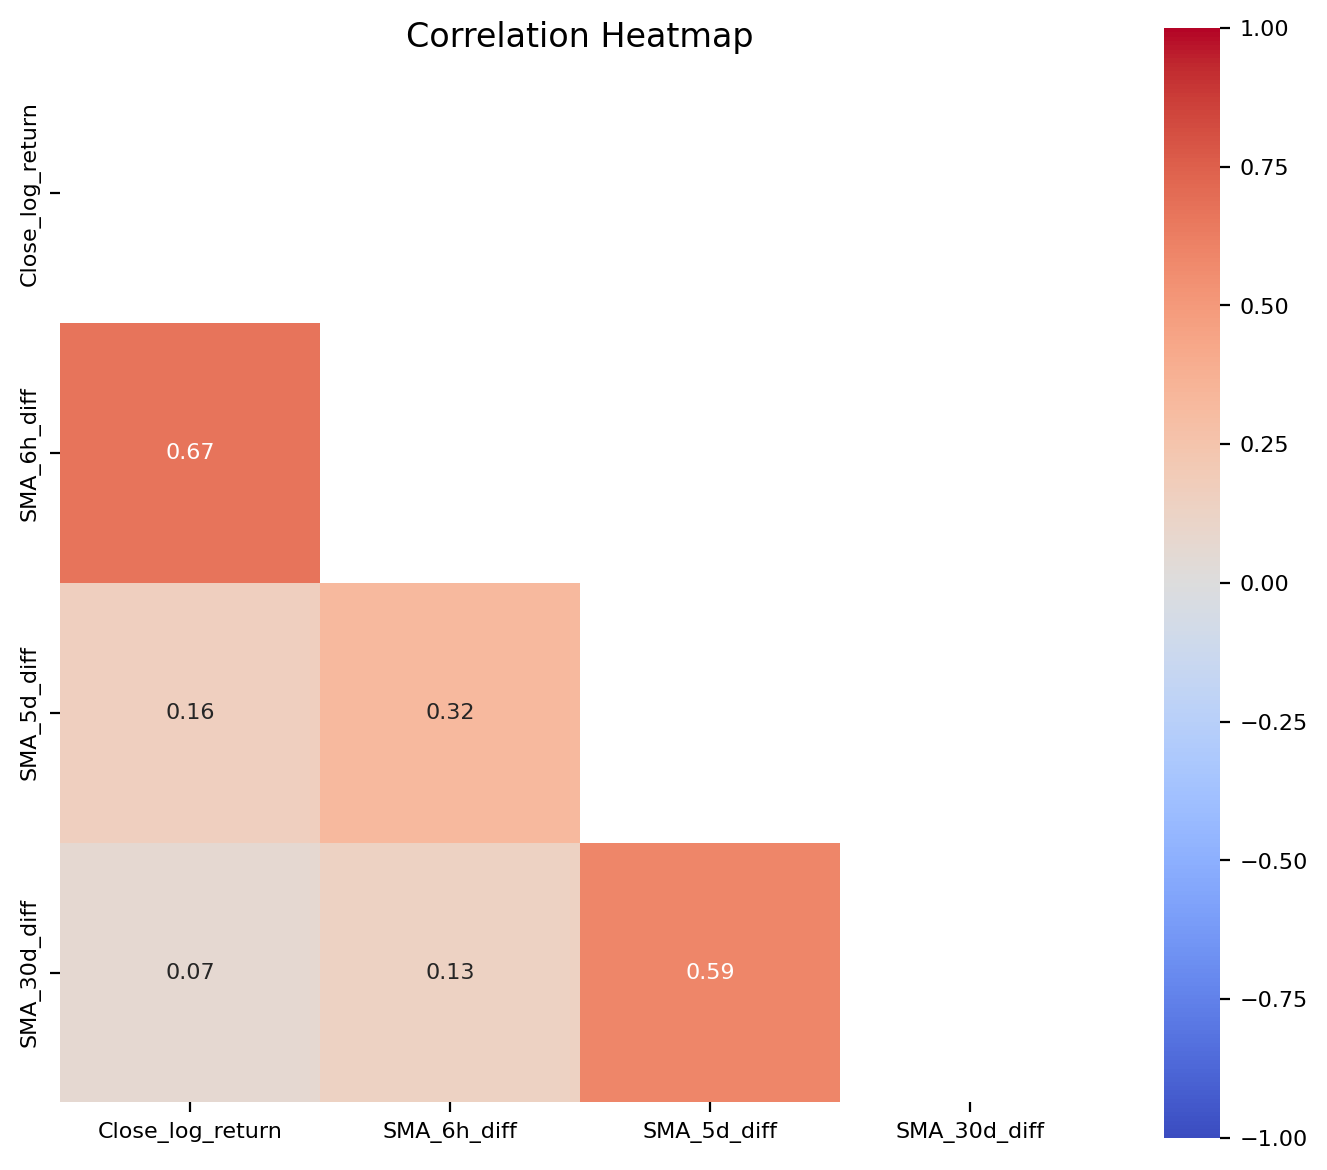

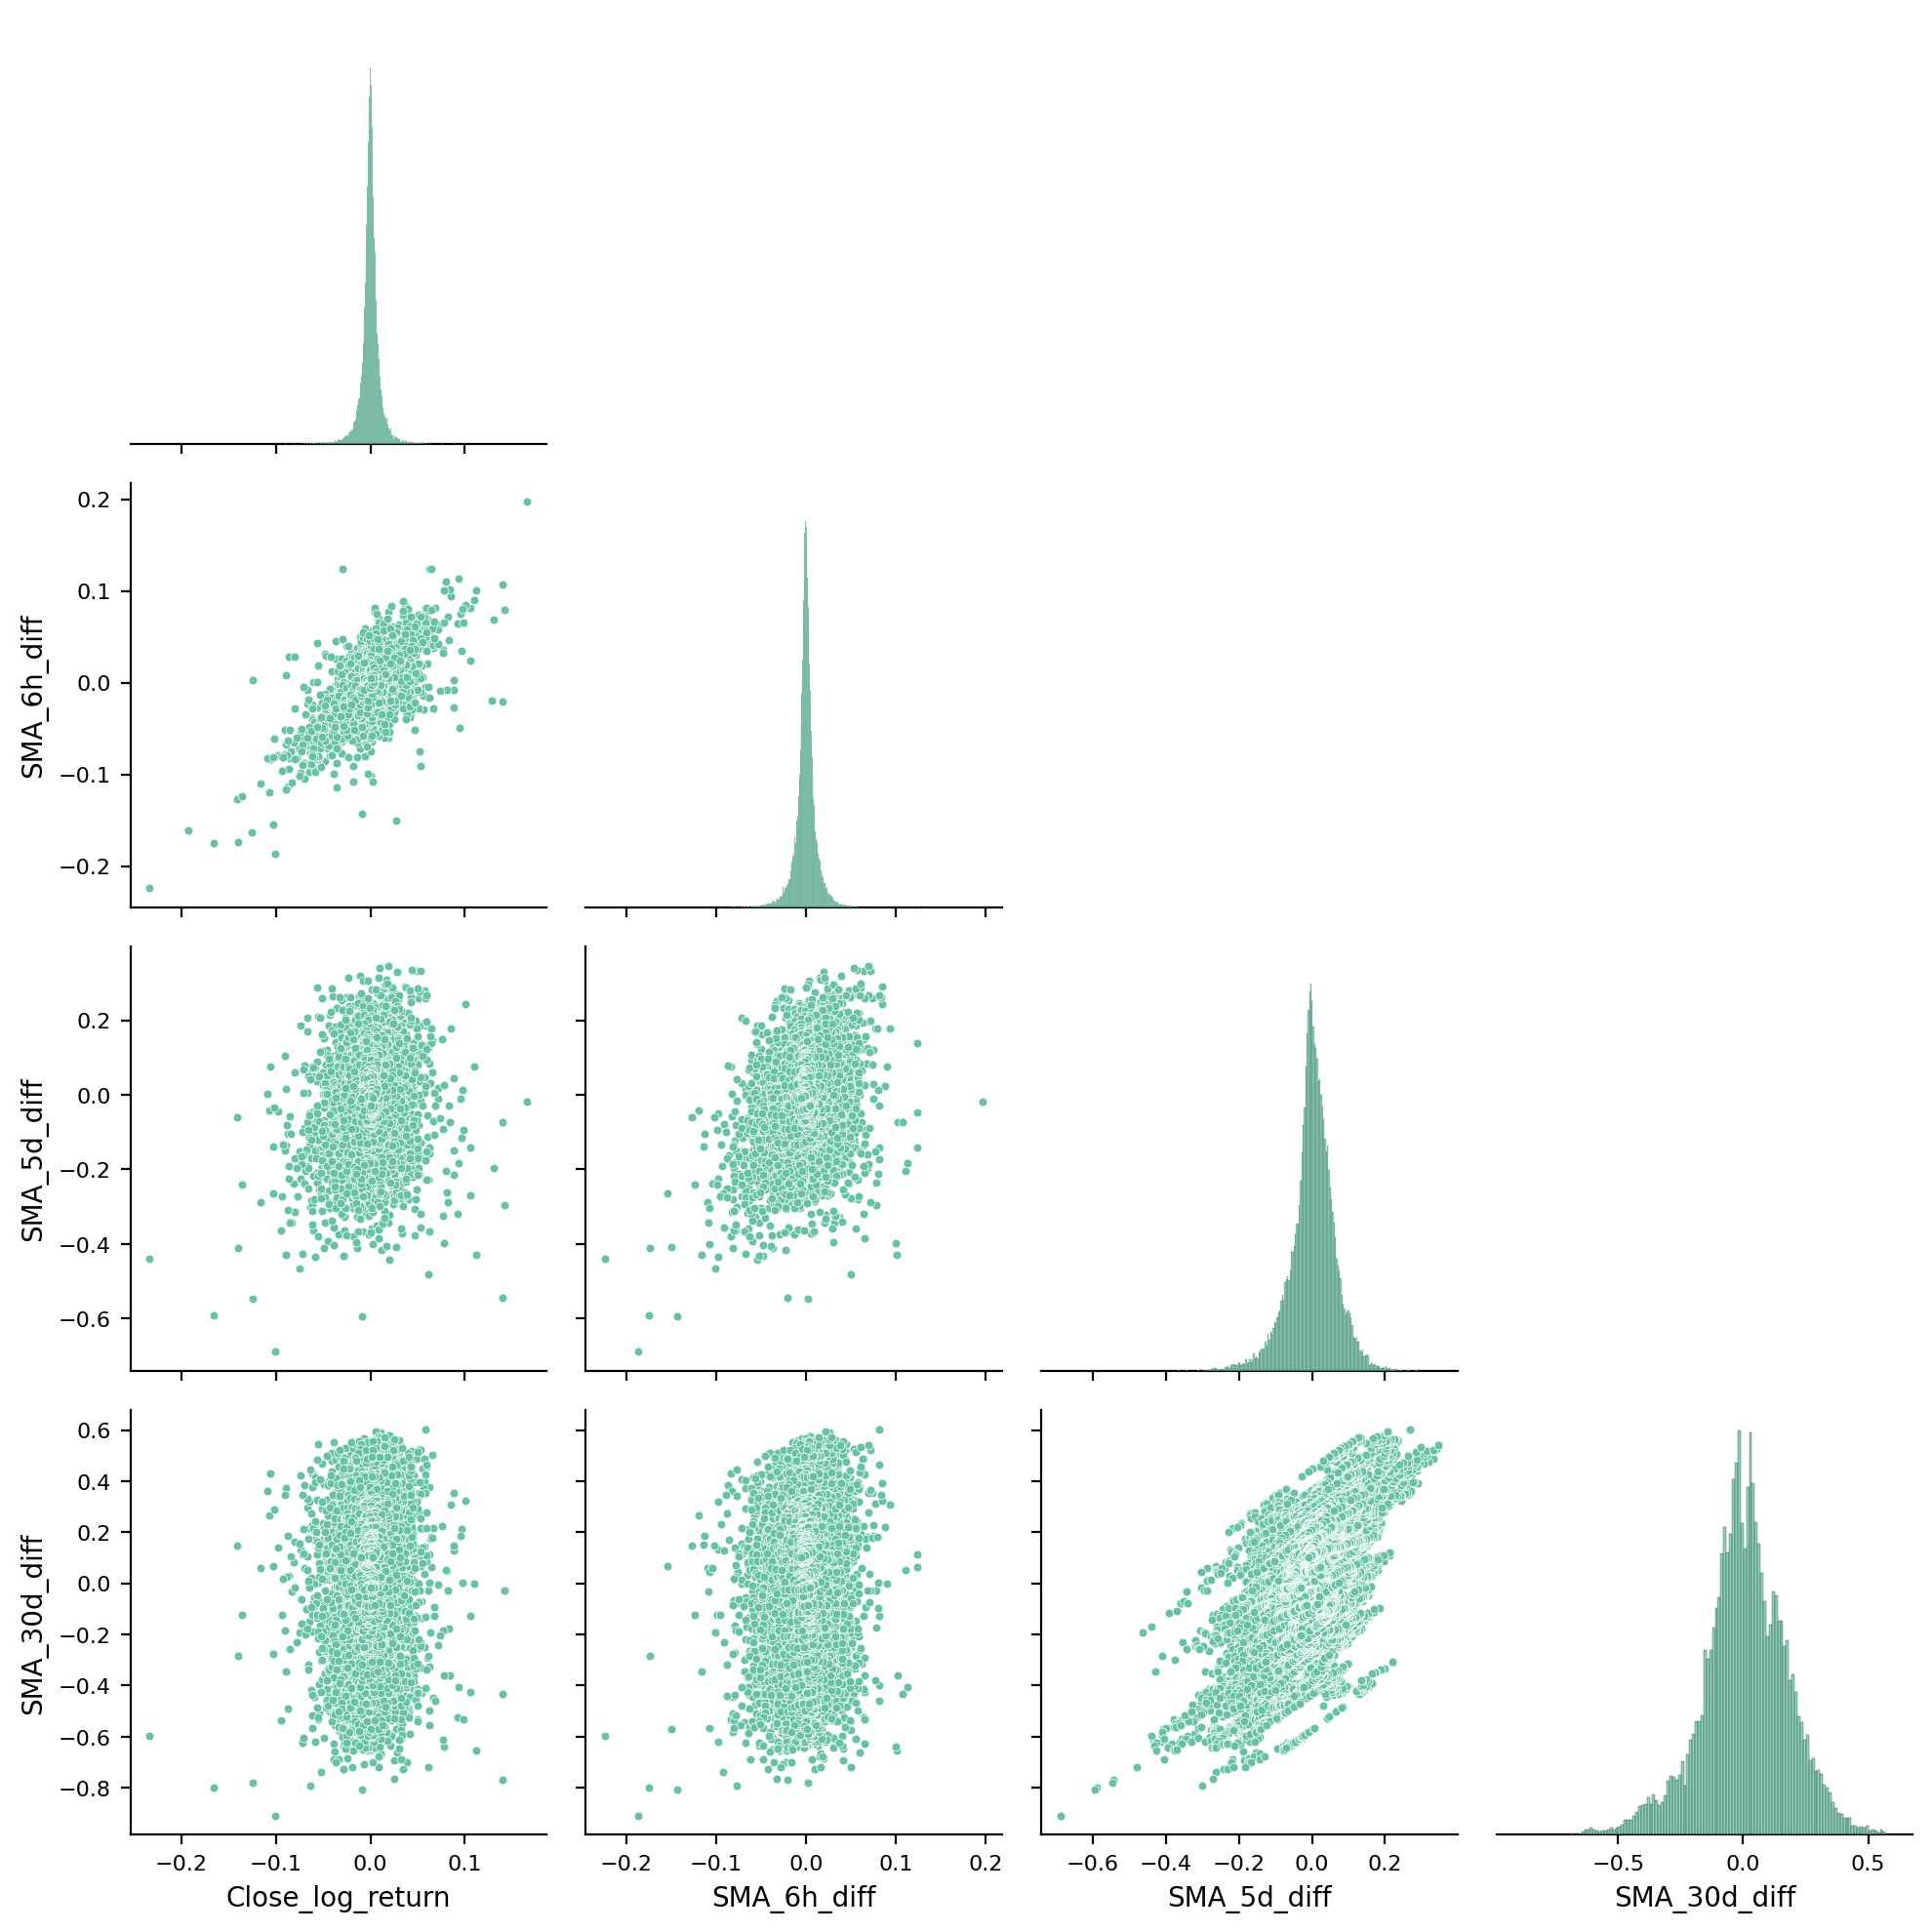

In [78]:
sma_log_df = df[cols]
hd.plot_corr_heatmap(sma_log_df)
hd.plot_pairplot(sma_log_df)

Видны более высокие корреляции между ценой и наименьшим 6часовым скользящим средним.

Торговля на бирже данным фьючерсом началась в сентябре 17 года и первые месяцы инструмент рассторговывался.

Этот период малорепрезентативен. Первые пол года исключаю.

### Индикатор RSI

In [79]:
df['rsi_14'] = ta.rsi(close=df['Close'], length=14)

In [80]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Trades', 'Open_log',
       'High_log', 'Low_log', 'Close_log', 'Volume_log', 'Trades_log',
       'Open_log_return', 'High_log_return', 'Low_log_return',
       'Close_log_return', 'up_move', 'down_move', 'up_shadow', 'down_shadow',
       'Month', 'Week_of_Year', 'Day_of_Month', 'Day_of_Week', 'Hour', 'Long',
       'SMA_6h', 'SMA_5d', 'SMA_30d', 'SMA_6h_log', 'SMA_5d_log',
       'SMA_30d_log', 'SMA_6h_diff', 'SMA_5d_diff', 'SMA_30d_diff', 'rsi_14'],
      dtype='object')

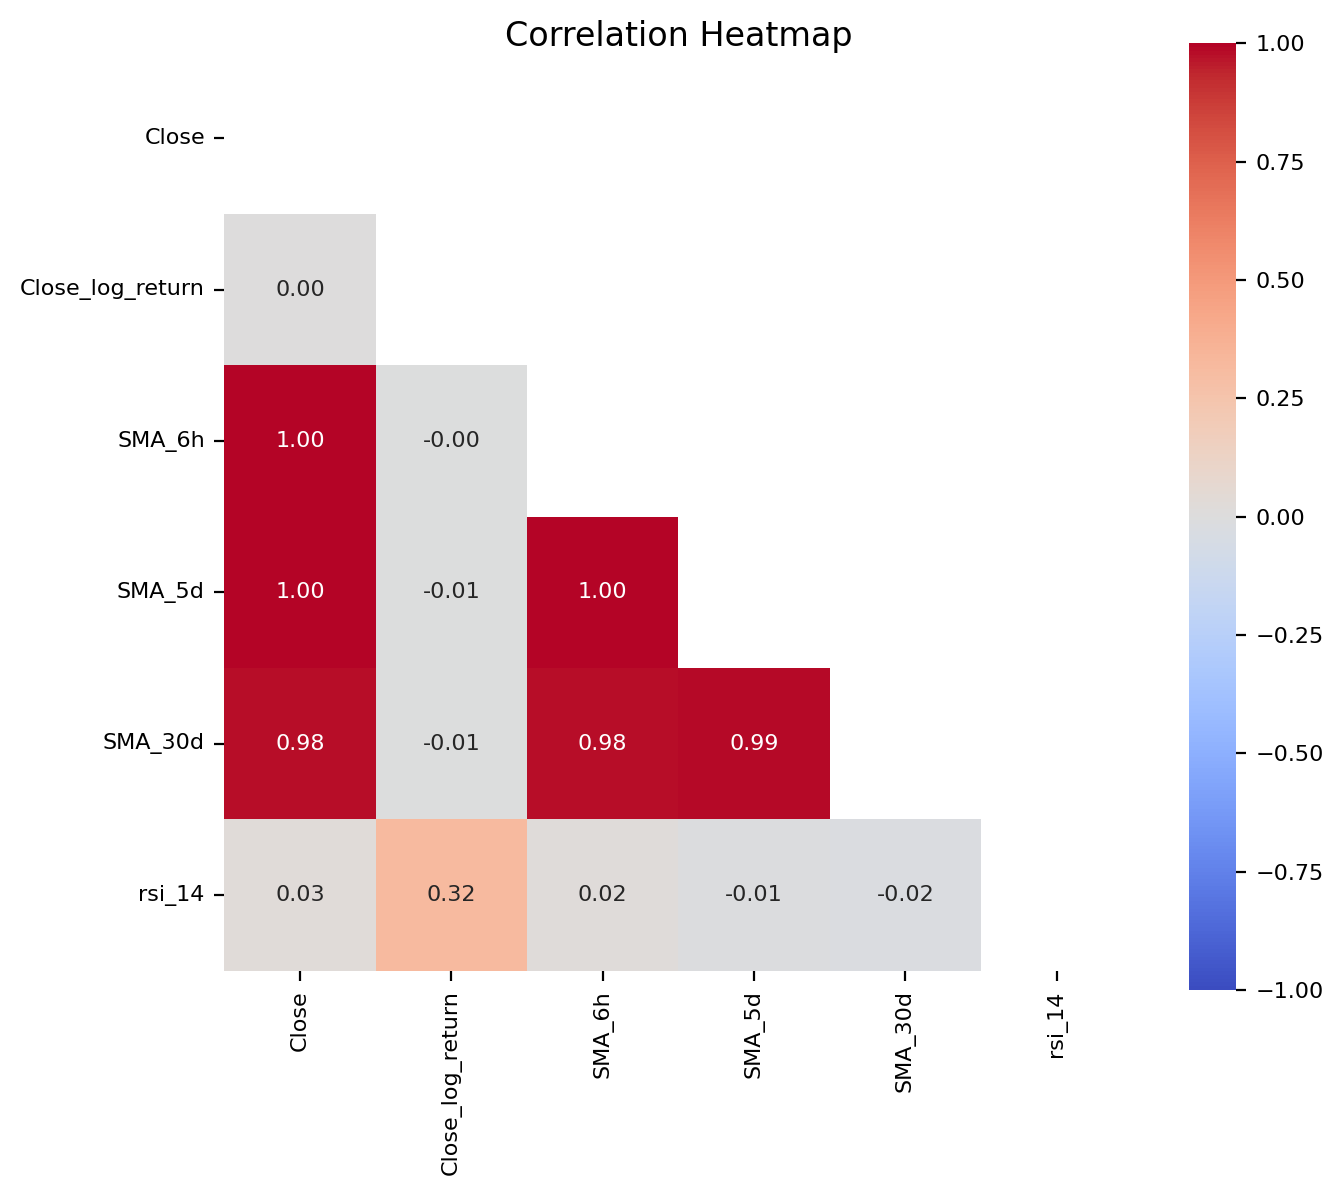

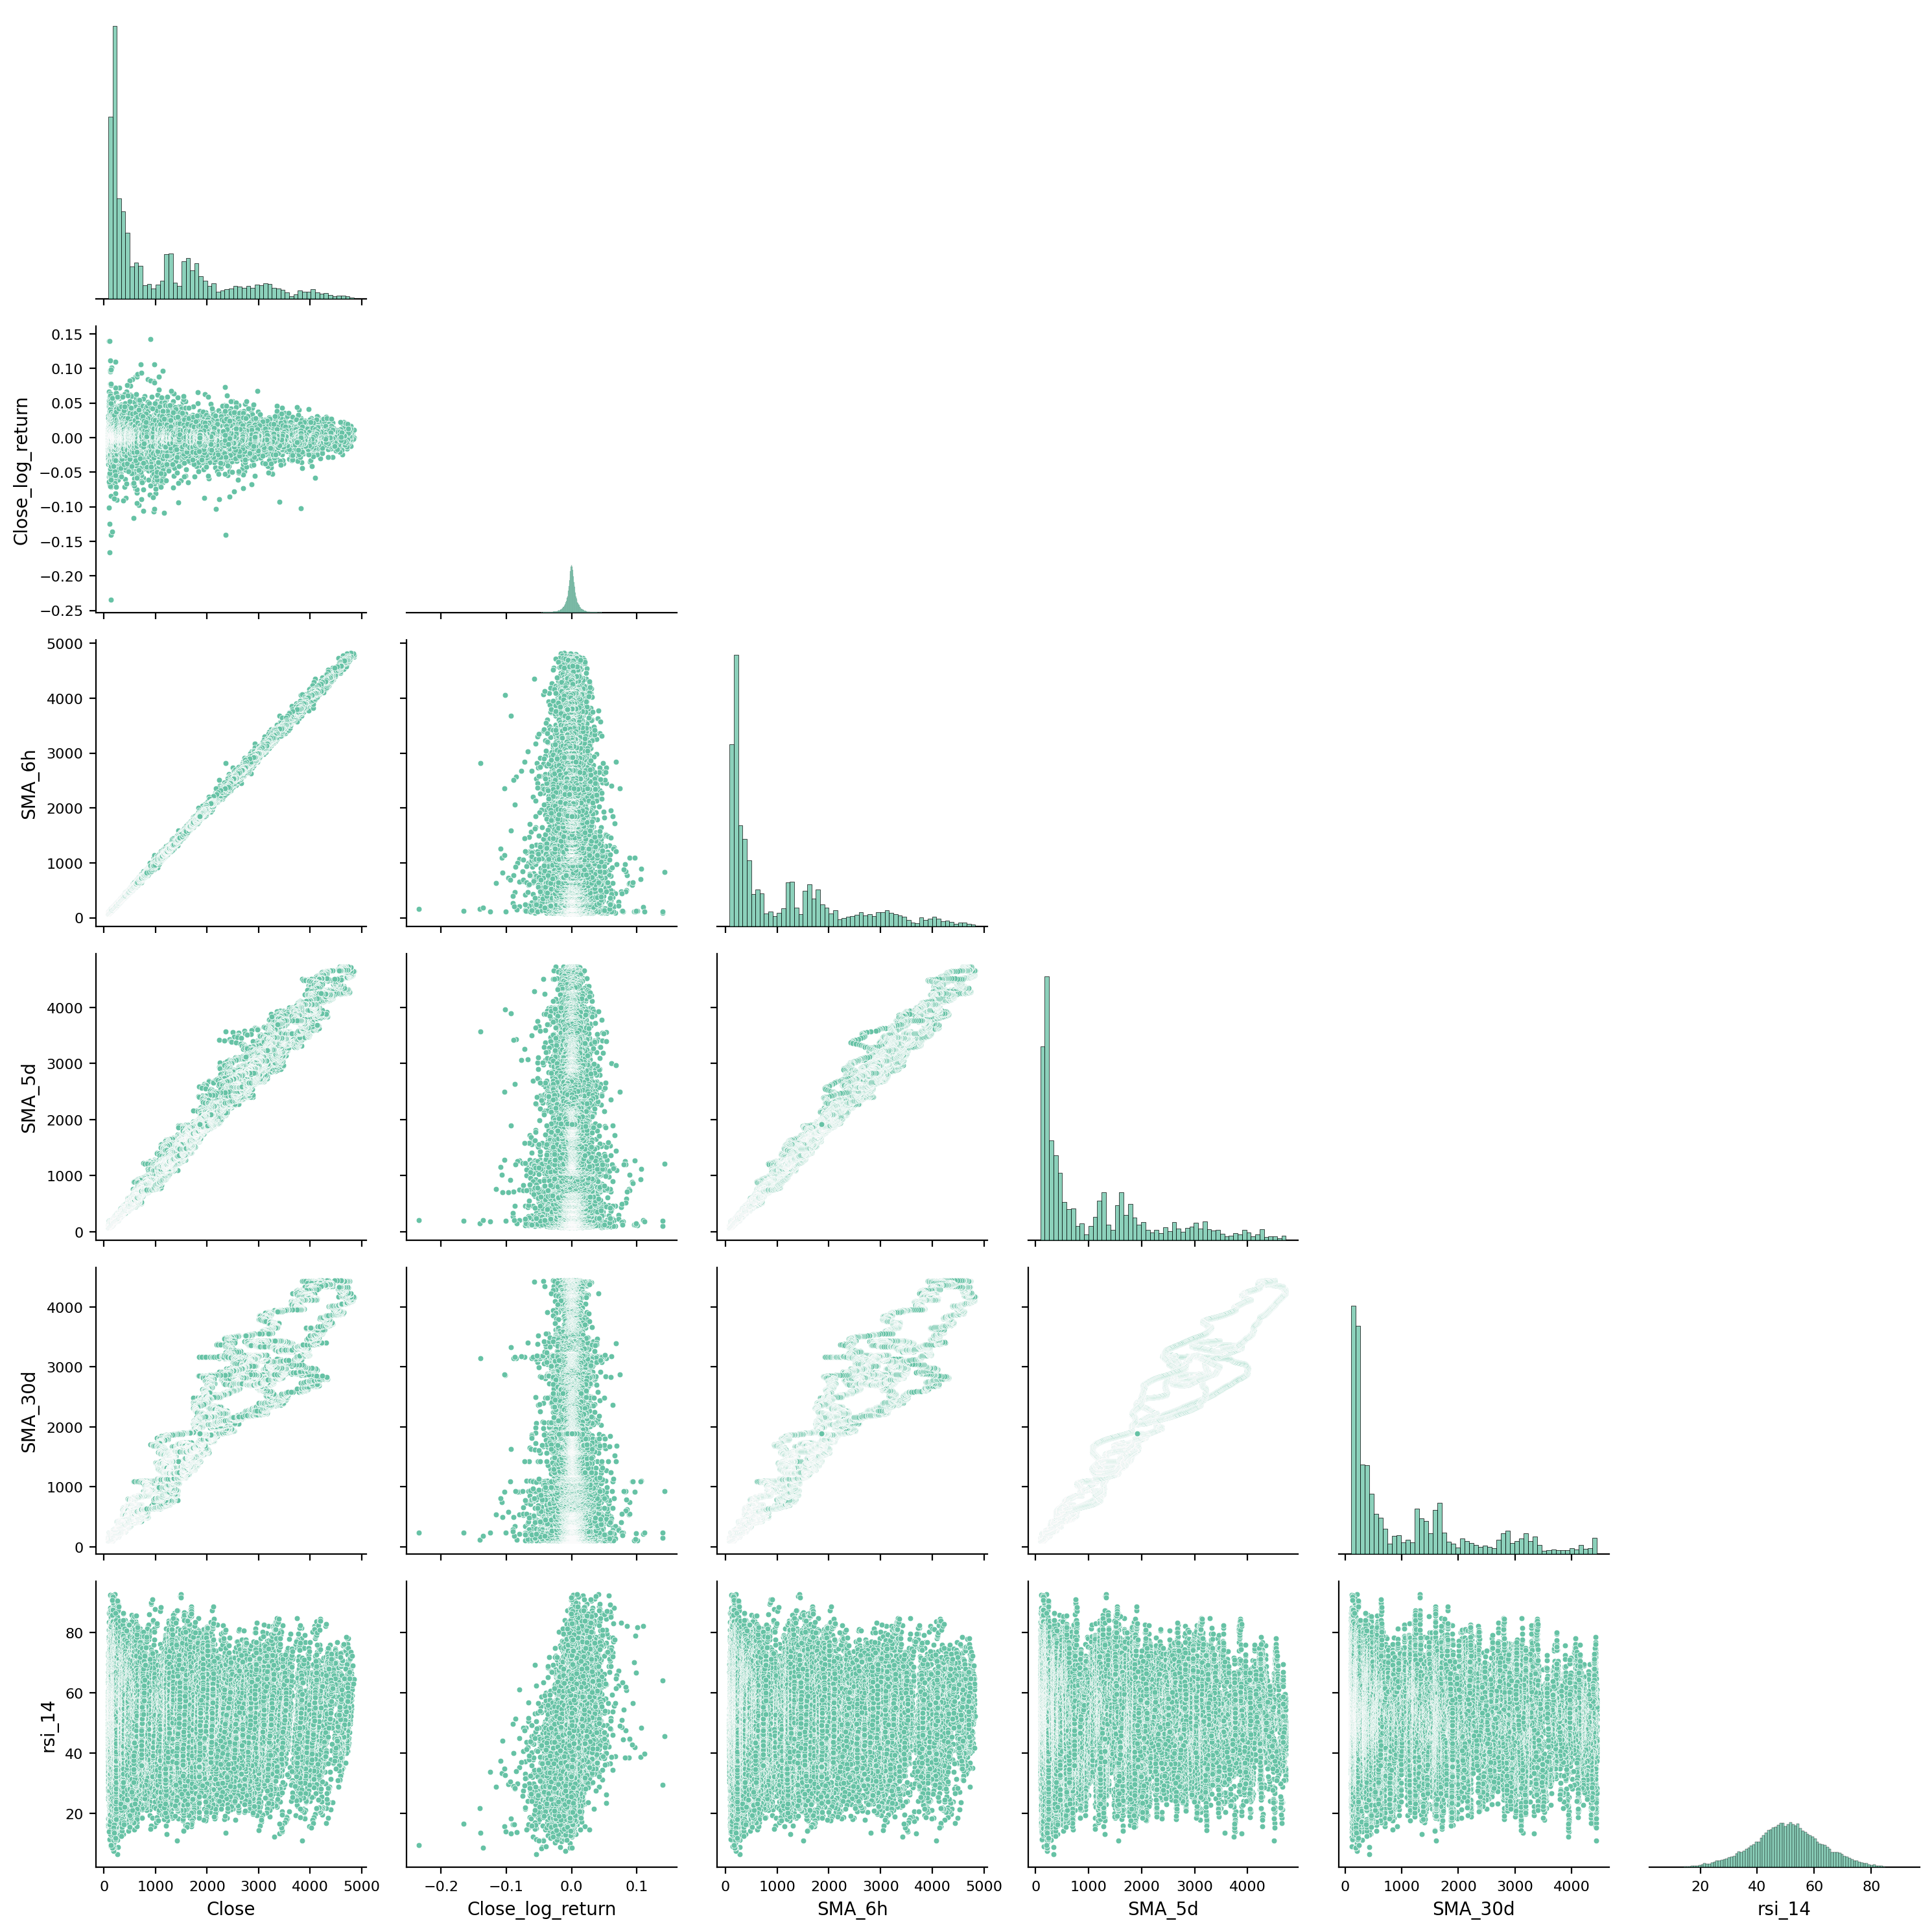

In [81]:
rsi_df = df[['Close', 'Close_log_return', 'SMA_6h', 'SMA_5d', 'SMA_30d', 'rsi_14']].dropna()
hd.plot_corr_heatmap(rsi_df)
hd.plot_pairplot(rsi_df)

### Сохранение подготовленной истории

In [82]:
# удаляю строки с пропусками образовавшимися после добавления инструментов ТА
df.dropna(inplace=True)
# подрезаю историю, убираю нерелевантный период расторговки
df.query('index >= "2018-03-01"', inplace=True)

In [83]:
df.to_parquet("../data/ETH-Full-1H_prepared.parquet")